The Super Resolution machine learning model sharpens and upscales the input image to refine the details and improve quality.

<center><img src="Media/M4/superres.PNG"/></center>



This model is trained on the [BSD300 Dataset](https://github.com/pytorch/examples/tree/master/super_resolution), using crops from the 200 training images.
This example trains a super-resolution network on the BSD300 dataset, using crops from the 200 training images, and evaluating on crops of the 100 test images. A snapshot of the model after every epoch with filename model_epoch_<epoch_number>.pth


[source](https://arxiv.org/pdf/1501.00092.pdf)

method directly learns an end-to-end
mapping between the low/high-resolution images. The mapping is represented as a deep convolutional neural network (CNN) that takes
the low-resolution image as the input and outputs the high-resolution one. We further show that traditional sparse-coding-based SR
methods can also be viewed as a deep convolutional network. But unlike traditional methods that handle each component separately,
our method jointly optimizes all layers. Our deep CNN has a lightweight structure, yet demonstrates state-of-the-art restoration quality,
and achieves fast speed for practical on-line usage. We explore different network structures and parameter settings to achieve tradeoffs between performance and speed. Moreover, we extend our network to cope with three color channels simultaneously, and show
better overall reconstruction quality.


According to the image priors, single-image super resolution algorithms can be categorized into four types –
prediction models, edge based methods, image statistical
methods and patch based (or example-based) methods.
These methods have been thoroughly investigated and
evaluated in Yang et al.’s work  Among them, the
example-based methodsachieve the
state-of-the-art performance




#### 3.1 Formulation
Consider a single low-resolution image, we first upscale
it to the desired size using bicubic interpolation, which
is the only pre-processing we perform3
. Let us denote
the interpolated image as Y. Our goal is to recover
from Y an image F(Y) that is as similar as possible
to the ground truth high-resolution image X. For the
ease of presentation, we still call Y a “low-resolution”
image, although it has the same size as X. We wish to
learn a mapping F, which conceptually consists of three
operations:

##### 1) Patch extraction and representation: 
this operation extracts (overlapping) patches from the lowresolution image Y and represents each patch as high-dimensional vector. These vectors comprise a
set of feature maps, of which the number equals to
the dimensionality of the vectors.

###### 2) Non-linear mapping: 
this operation nonlinearly
maps each high-dimensional vector onto another
high-dimensional vector. Each mapped vector is
conceptually the representation of a high-resolution
patch. These vectors comprise another set of feature
maps.
##### 3) Reconstruction: 
this operation aggregates the
above high-resolution patch-wise representations
to generate the final high-resolution image. This
image is expected to be similar to the ground truth

In [892]:
# Import Required libraries
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

from tkinter import filedialog
from tkinter import Tk
import os
%matplotlib inline

onnxFile = 'Media/M4/Model/super_resolution.onnx'
net = cv2.dnn.readNetFromONNX(onnxFile)

## Image Preprocessing

Images are resized into (224x224). The image format is changed into YCbCr with color components: greyscale ‘Y’, blue-difference ‘Cb’, and red-difference ‘Cr’. Once the greyscale Y component is extracted, it is then passed through the super resolution model and upscaled.

In [893]:
root = Tk()
filename =  filedialog.askopenfilename(title = "Select Image")
root.withdraw()
image = cv2.imread(filename)

img_copy = image.copy()

img_copy = cv2.resize(img_copy, (224,224))

imgYCC = cv2.cvtColor(img_copy, cv2.COLOR_BGR2YCrCb)

img_y_0, img_cb, img_cr = cv2.split(imgYCC)

img_ndarray = np.asarray(img_y_0)

img_4 = np.expand_dims(np.expand_dims(img_ndarray, axis=0), axis=0)
img_5 = img_4.astype(np.float32) / 255.0

In [894]:
img_5.shape

(1, 1, 224, 224)

Super-resolution is a way of increasing the resolution of images, videos
and is widely used in image processing or video editing. For this
tutorial, we will use a small super-resolution model.

First, let's create a SuperResolution model in PyTorch.
This model uses the efficient sub-pixel convolution layer described in
`"Real-Time Single Image and Video Super-Resolution Using an Efficient
Sub-Pixel Convolutional Neural Network" - Shi et al <https://arxiv.org/abs/1609.05158>`__
for increasing the resolution of an image by an upscale factor.
The model expects the Y component of the YCbCr of an image as an input, and
outputs the upscaled Y component in super resolution.

`The
model <https://github.com/pytorch/examples/blob/master/super_resolution/model.py>`__
comes directly from PyTorch's examples without modification:


In [895]:
net.setInput(img_5)

Output = net.forward()
#print(emotions[Output.argmax()])
print(Output.shape)
#https://github.com/onnx/models/tree/master/vision/body_analysis/emotion_ferplus
# Send faces not whole images, and each image in original dataset has multiple labels.

(1, 1, 672, 672)


In [896]:
print(Output.shape)
print(img_cb.shape)
print(img_cr.shape)

(1, 1, 672, 672)
(224, 224)
(224, 224)


## Post Processing

outputs a multidimensional array of pixels that are upscaled. Output shape is [batch_size,1,672,672]. The second dimension is one because only the (Y) intensity channel was passed into the super resolution model and upscaled.

In [897]:
img_cb1 = cv2.resize(img_cb,(672,672),cv2.INTER_CUBIC)
img_cr1 = cv2.resize(img_cr,(672,672),cv2.INTER_CUBIC)

In [898]:
print(img_cb1.shape)
print(img_cr1.shape)

(672, 672)
(672, 672)


In [899]:
img_cb1.dtype

dtype('uint8')

In [900]:
Output1 = np.clip(Output.reshape(672,672) *255.0, 0, 255)

In [901]:
final_img = cv2.merge((Output1.astype('uint8'),img_cb1,img_cr1))

In [902]:
final_img1 = cv2.cvtColor(final_img,cv2.COLOR_YCR_CB2BGR)


In [903]:
final_img1.shape

(672, 672, 3)

In [904]:
# cv2.imshow("image",final_img1);
# cv2.waitKey(0)
# cv2.destroyAllWindows()



In [905]:
#  image = cv2.resize(image,(672,672))

In [906]:
# final = np.hstack((image,final_img1))

In [907]:
# plt.figure(figsize=[20,20])

# plt.imshow(final[:,:,::-1]);plt.title("final Image");plt.axis("off");

In [908]:
 image = cv2.resize(image,(672,672))

In [938]:
plt.figure(figsize=[20,20])
plt.subplot(1,2,1);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis("off");
plt.subplot(1,2,2);plt.imshow(final_img1[:,:,::-1]);plt.title("Super Resolution Image");plt.axis("off");

In [925]:
def resolution():
    root = Tk()
    root.filename =  filedialog.askopenfilename(title = "Pick up the Image")
    root.withdraw()
    image = cv2.imread(root.filename)
    img_copy = image.copy()

    img_copy = cv2.resize(img_copy, (224,224))

    imgYCC = cv2.cvtColor(img_copy, cv2.COLOR_BGR2YCrCb)

    img_y_0, img_cb, img_cr = cv2.split(imgYCC)

    img_ndarray = np.asarray(img_y_0)

    img_4 = np.expand_dims(np.expand_dims(img_ndarray, axis=0), axis=0)
    img_5 = img_4.astype(np.float32) / 255.0
    
    net.setInput(img_5)
    Output = net.forward()

    img_cb1 = cv2.resize(img_cb,(672,672),cv2.INTER_CUBIC)
    img_cr1 = cv2.resize(img_cr,(672,672),cv2.INTER_CUBIC)
    
    Output1 = np.clip(Output.reshape(672,672) *255.0, 0, 255)
    
    final_img = cv2.merge((Output1.astype('uint8'),img_cb1,img_cr1))
    
    final_img1 = cv2.cvtColor(final_img,cv2.COLOR_YCR_CB2BGR)
    
    image = cv2.resize(image,(672,672))
    
    plt.figure(figsize=[20,20])
    plt.subplot(1,2,1);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis("off");
    plt.subplot(1,2,2);plt.imshow(final_img1[:,:,::-1]);plt.title("Super Resolution Image");plt.axis("off");
        
    

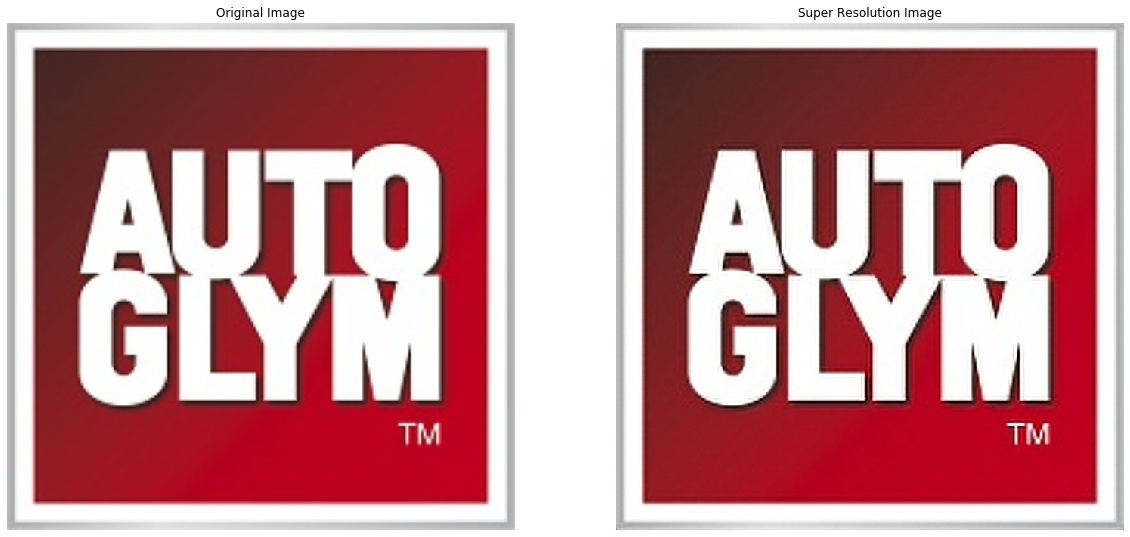

In [927]:
resolution()

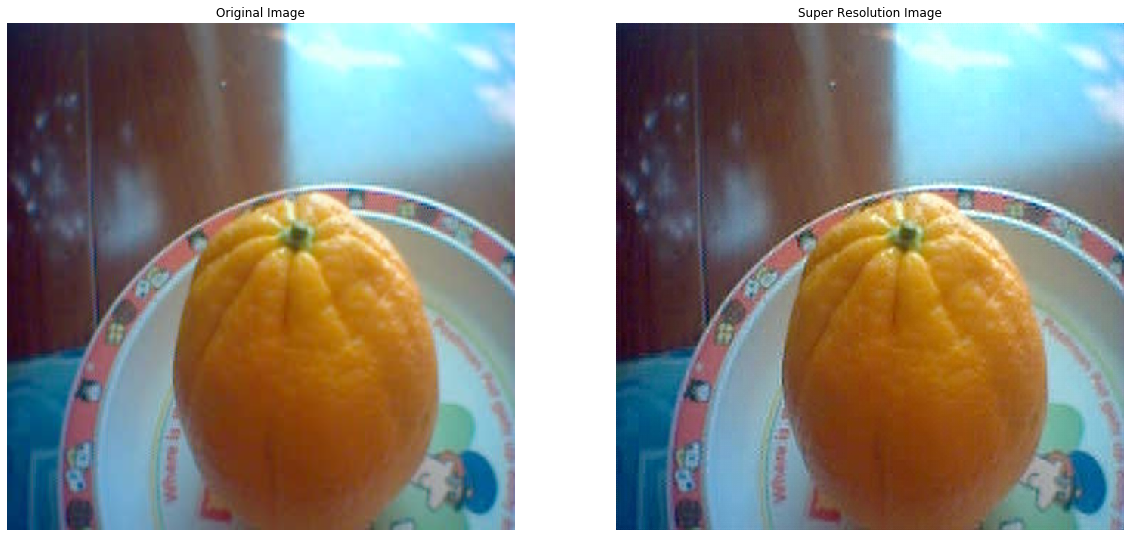

In [926]:
resolution()

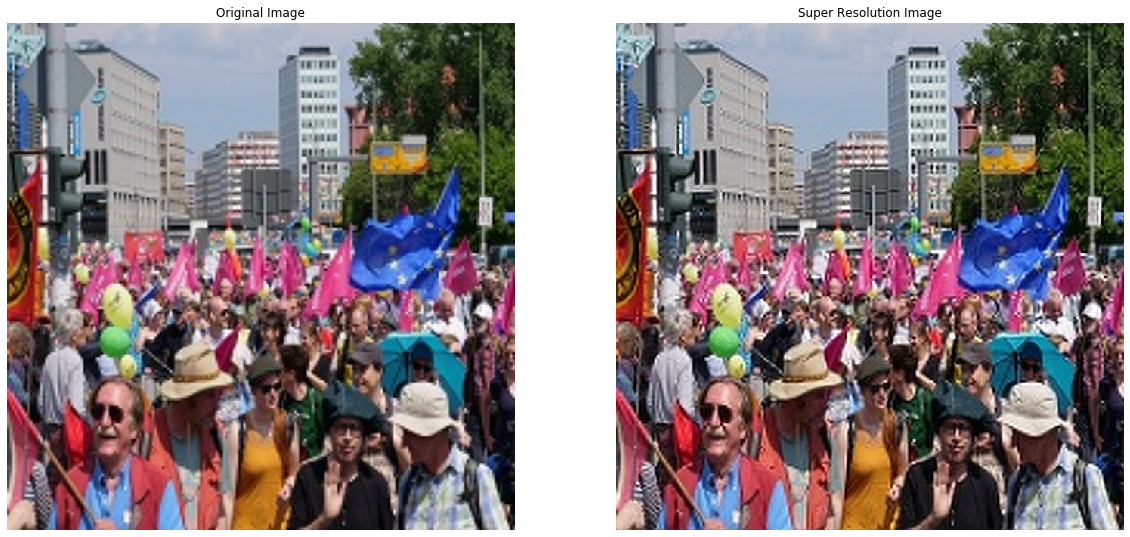

In [929]:
resolution()

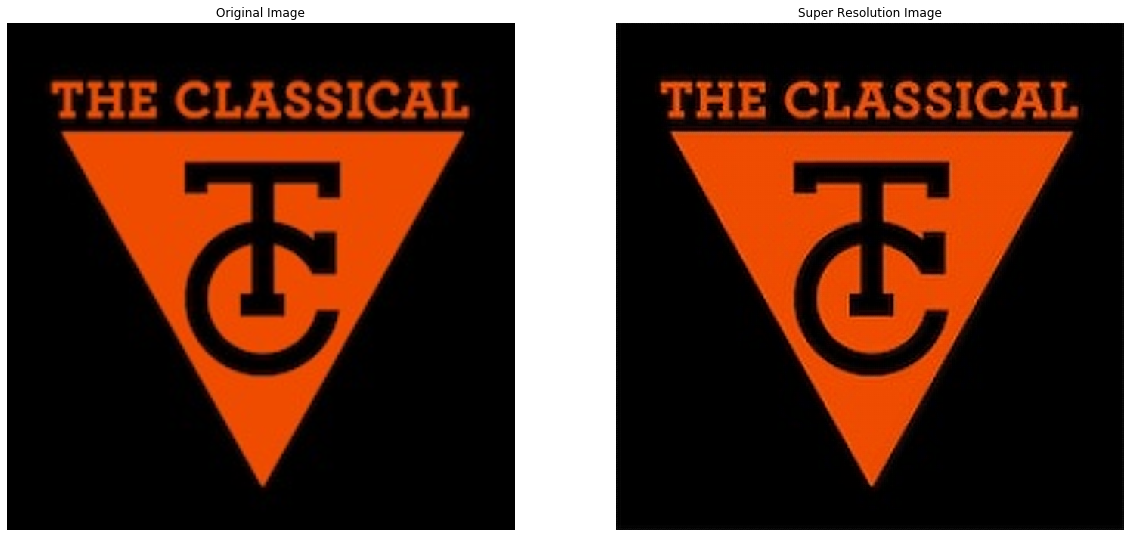

In [933]:
resolution()

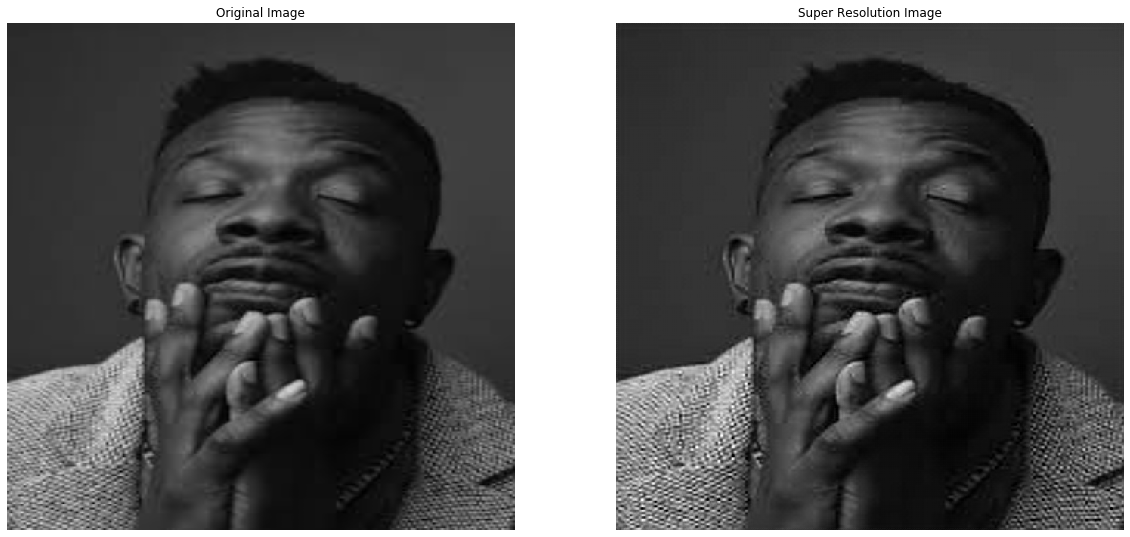

In [942]:
resolution()

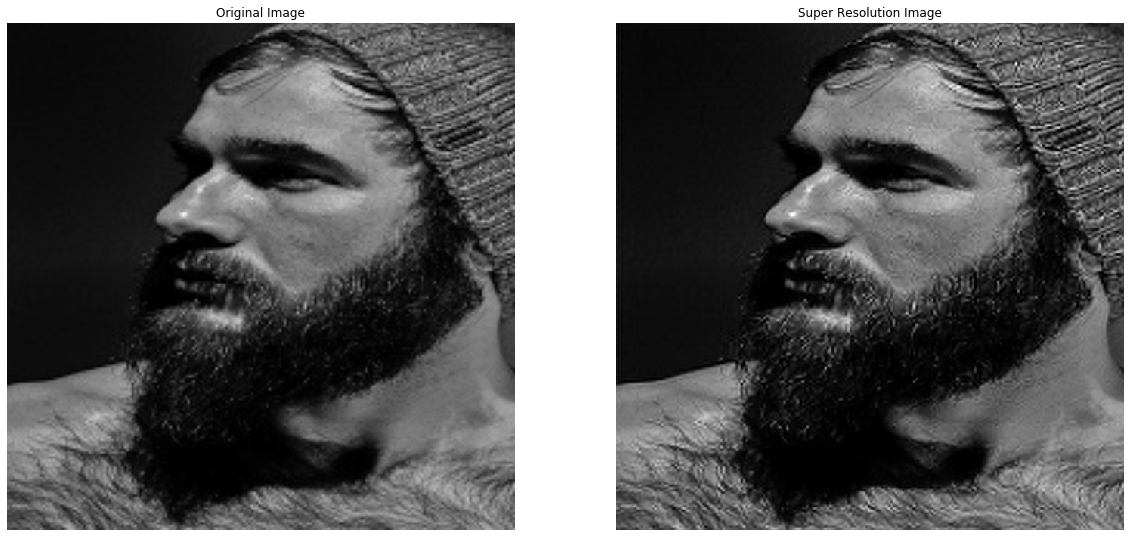

In [943]:
resolution()

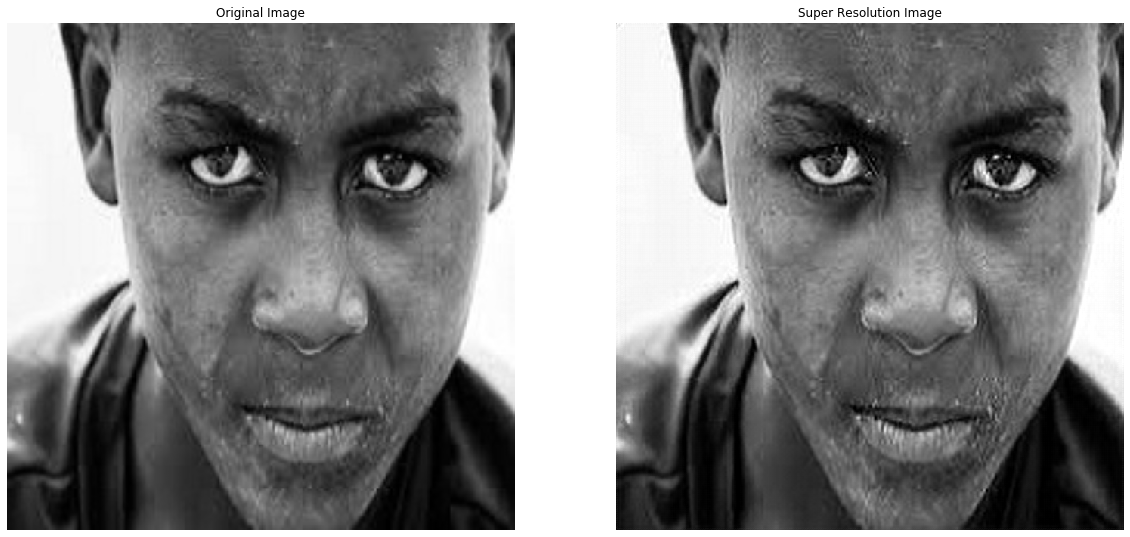

In [944]:
resolution()

# Second Implimentation

In [50]:
# from PIL import Image
# from resizeimage import resizeimage
# import numpy as np
# import cv2
# import onnxruntime
# import matplotlib.pyplot as plt
# filename = "Media/M4/resolution1.jpg"
# orig_img = Image.open(filename)
# img = resizeimage.resize_cover(orig_img, [224,224], validate=False)
# img_ycbcr = img.convert('YCbCr')
# img_y_0, img_cb, img_cr = img_ycbcr.split()
# img_ndarray = np.asarray(img_y_0)
# img_4 = np.expand_dims(np.expand_dims(img_ndarray, axis=0), axis=0)
# img_5 = img_4.astype(np.float32) / 255.0
# img_5

array([[[[0.9254902 , 0.92156863, 0.92156863, ..., 0.94509804,
          0.94509804, 0.94509804],
         [0.9254902 , 0.92156863, 0.92156863, ..., 0.94509804,
          0.94509804, 0.94509804],
         [0.92156863, 0.92156863, 0.92156863, ..., 0.94509804,
          0.94509804, 0.94509804],
         ...,
         [0.8156863 , 0.8156863 , 0.827451  , ..., 0.90588236,
          0.9098039 , 0.9098039 ],
         [0.8235294 , 0.8156863 , 0.8156863 , ..., 0.90588236,
          0.90588236, 0.90588236],
         [0.83137256, 0.81960785, 0.80784315, ..., 0.90588236,
          0.90588236, 0.90588236]]]], dtype=float32)

In [51]:
# ort_session = onnxruntime.InferenceSession('Media/M4/Model/super_resolution.onnx')
# ort_inputs = {ort_session.get_inputs()[0].name: img_5} 
# ort_outs = ort_session.run(None, ort_inputs)
# img_out_y = ort_outs[0]

In [52]:
# img_out_y = Image.fromarray(np.uint8((img_out_y[0] * 255.0).clip(0, 255)[0]), mode='L')

In [53]:
# final_img = Image.merge(
# "YCbCr", [
#     img_out_y,
#     img_cb.resize(img_out_y.size, Image.BICUBIC),
#     img_cr.resize(img_out_y.size, Image.BICUBIC),
# ]).convert("RGB")



In [937]:
# plt.figure(figsize=[15,15])
# plt.subplot(1,2,1);plt.imshow(orig_img);plt.title("Original Image");plt.axis("off");
# plt.subplot(1,2,2);plt.imshow(final_img);plt.title("Super Resolution Image");plt.axis("off");

In [18]:
import numpy as np
import tensorflow as tf


C:\Users\parde\Anaconda3\envs\opencv-env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\parde\Anaconda3\envs\opencv-env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\parde\Anaconda3\envs\opencv-env\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\parde\Anaconda3\envs\opencv-env\lib\site-packages

In [62]:
import cv2
net = cv2.dnn.readNet("Media/M4/Model/LapSRN_x8.pb")

In [63]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [64]:
SCALE =4

In [65]:
fullimg = cv2.imread("Media/M4/resolution4.jpg", 3)
width = fullimg.shape[0]
height = fullimg.shape[1]

cropped = fullimg[0:(width - (width % SCALE)), 0:(height - (height % SCALE)), :]
img = cv2.resize(cropped, None, fx=1. / SCALE, fy=1. / SCALE, interpolation=cv2.INTER_CUBIC)
floatimg = img.astype(np.float32) / 255.0

# Convert to YCbCr color space
imgYCbCr = cv2.cvtColor(floatimg, cv2.COLOR_BGR2YCrCb)
imgY = imgYCbCr[:, :, 0]
LR_input_ = imgY.reshape(1, imgY.shape[0], imgY.shape[1], 1)


In [66]:
# with tf.Session(config=config) as sess:
    
#     print("\nStart running tests on the model\n")
#     # #load the model with tf.data generator
#     ckpt_name = ARGS["CKPT"] + ".meta"
#     saver = tf.train.import_meta_graph(ckpt_name)
#     saver.restore(sess, tf.train.latest_checkpoint(ARGS["CKPT_dir"]))
#     graph_def = sess.graph
#     LR_tensor = sess.graph.get_tensor_by_name("IteratorGetNext:0")
#     inp = cv2.cvtColor((cropped.astype(np.float32) / 255.0), cv2.COLOR_BGR2YCrCb)[:, :, 0].reshape(1,
#                                                                                                        cropped.shape[0],
#                                                                                                        cropped.shape[1],
#                                                                                                        1)

In [67]:
 inp = cv2.cvtColor((cropped.astype(np.float32) / 255.0), cv2.COLOR_BGR2YCrCb)[:, :, 0].reshape(1,
                                                                                                       cropped.shape[0],
                                                                                                       cropped.shape[1],
                                                                                                                    1)

In [68]:
bicub = cv2.cvtColor(cv2.resize(cropped, None, fx=SCALE, fy=SCALE, interpolation=cv2.INTER_CUBIC),
                             cv2.COLOR_BGR2YCrCb)

In [69]:
inp.shape

(1, 300, 300, 1)

In [70]:
# graph_def = sess.graph.as_graph_def()
# outputs = ['NCHW_output', 'NCHW_output_2x', 'NCHW_output_4x']
# graph_def = tf.graph_util.convert_variables_to_constants(sess, graph_def, outputs)

In [71]:
# output = sess.run(sess.graph.get_tensor_by_name("NCHW_output:0"), feed_dict={LR_tensor: inp})

In [74]:
inp.shape

(1, 300, 300, 1)

In [72]:
net.setInput(inp)

In [73]:
Output = net.forward()

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\dnn\src\layers\convolution_layer.cpp:339: error: (-215:Assertion failed) ngroups > 0 && inpCn % ngroups == 0 && outCn % ngroups == 0 in function 'cv::dnn::ConvolutionLayerImpl::getMemoryShapes'
